## 导入包

In [1]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda#导入LDA算法
from sklearn.datasets._samples_generator import make_classification #导入分类生成器
import matplotlib.pyplot as plt #导入画图用的工具
import numpy as np
import pandas as pd

## 获取数据集并进行训练

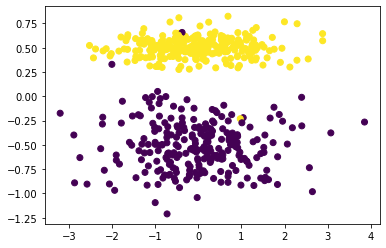

In [63]:
x,y=make_classification(n_samples=500,n_features=2,n_redundant=0,n_classes=2,n_informative=1,n_clusters_per_class=1,class_sep=0.5,random_state=100)
"""
n_features :特征个数= n_informative（） + n_redundant + n_repeated
n_informative：多信息特征的个数
n_redundant：冗余信息，informative特征的随机线性组合
n_repeated ：重复信息，随机提取n_informative和n_redundant 特征
n_classes：分类类别
n_clusters_per_class ：某一个类别是由几个cluster构成的

"""
plt.scatter(x[:,0],x[:,1], marker='o', c=y)
plt.show()


In [66]:
#分为训练集和测试集，进行模型训练并测试
x_train=x[:300, :300]
y_train=y[:300]
x_test=x[200:, :]
y_test=y[200:]
lda_test=lda()
lda_test.fit(x_train,y_train)
predict_y=lda_test.predict(x_test)#获取预测的结果
count=0
for i in range(len(predict_y)):
    if predict_y[i]==y_test[i]:
        count+=1
print("预测准确个数为"+str(count))
print("准确率为"+str(count/len(predict_y)))

预测准确个数为296
准确率为0.9866666666666667


## 使用SVM对月亮数据集进行分类

In [31]:
# 导入月亮数据集和svm方法
#这是线性svm
from sklearn import datasets #导入数据集
from sklearn.svm import LinearSVC #导入线性svm
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler

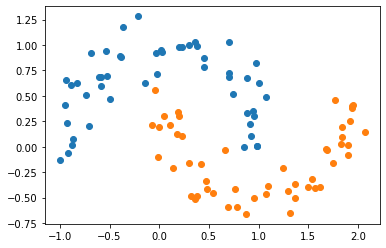

In [32]:
data_x,data_y=datasets.make_moons(noise=0.15,random_state=777)#生成月亮数据集
# random_state是随机种子，nosie是方
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1])
plt.scatter(data_x[data_y==1,0],data_x[data_y==1,1])
data_x=data_x[data_y<2,:2]#只取data_y小于2的类别，并且只取前两个特征
plt.show()

In [42]:
scaler=StandardScaler()# 标准化
scaler.fit(data_x)#计算训练数据的均值和方差
data_x=scaler.transform(data_x) #再用scaler中的均值和方差来转换X，使X标准化
liner_svc=LinearSVC(C=1e9,max_iter=100000)#线性svm分类器,iter是迭达次数
liner_svc.fit(data_x,data_y)

D:\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(C=1000000000.0, max_iter=10000000)

In [34]:
# 边界绘制函数
def plot_decision_boundary(model,axis):
    x0,x1=np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1]-axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3]-axis[2])*100)).reshape(-1,1))
    # meshgrid函数是从坐标向量中返回坐标矩阵
    x_new=np.c_[x0.ravel(),x1.ravel()]
    y_predict=model.predict(x_new)#获取预测值
    zz=y_predict.reshape(x0.shape)
    custom_cmap=ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    plt.contourf(x0,x1,zz,cmap=custom_cmap)

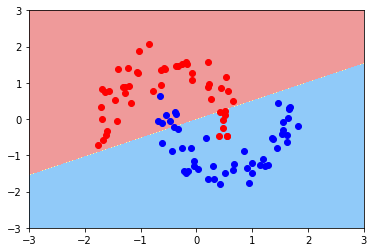

参数权重
[[ 0.38421031 -0.74776572]]
模型截距
[-0.01471581]


In [35]:
#画图并显示参数和截距
plot_decision_boundary(liner_svc,axis=[-3,3,-3,3])
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1],color='red')
plt.scatter(data_x[data_y==1,0],data_x[data_y==1,1],color='blue')
plt.show()
print('参数权重')
print(liner_svc.coef_)
print('模型截距')
print(liner_svc.intercept_)

## svm进行分类（多项式核）

In [36]:
# 导入月亮数据集和svm方法
#这是多项式核svm
from sklearn import datasets #导入数据集
from sklearn.svm import LinearSVC #导入线性svm
from sklearn.pipeline import Pipeline #导入python里的管道
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures #导入多项式回归和标准化

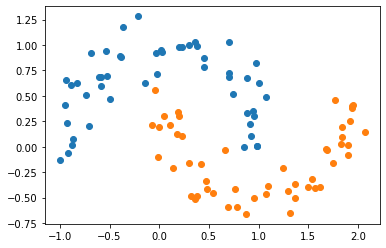

In [37]:
data_x,data_y=datasets.make_moons(noise=0.15,random_state=777)#生成月亮数据集
# random_state是随机种子，nosie是方
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1])
plt.scatter(data_x[data_y==1,0],data_x[data_y==1,1])
data_x=data_x[data_y<2,:2]#只取data_y小于2的类别，并且只取前两个特征
plt.show()

In [67]:
 def PolynomialSVC(degree,c=10):#多项式svm
    return Pipeline([
            # 将源数据 映射到 3阶多项式
            ("poly_features", PolynomialFeatures(degree=degree)),
            # 标准化
            ("scaler", StandardScaler()),
            # SVC线性分类器
            ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42,max_iter=10000))
        ])

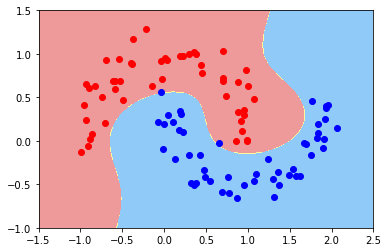

参数权重
[[ 0.         -1.11503813 -0.3859155  -4.77101069 -0.78915219 -0.19449911
   6.64662863 -0.84933143  2.62275593 -2.48554416]]
模型截距
[-0.42736442]


In [38]:
# 进行模型训练并画图
poly_svc=PolynomialSVC(degree=3)
poly_svc.fit(data_x,data_y)
plot_decision_boundary(poly_svc,axis=[-1.5,2.5,-1.0,1.5])#绘制边界
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1],color='red')#画点
plt.scatter(data_x[data_y==1,0],data_x[data_y==1,1],color='blue')
plt.show()
print('参数权重')
print(poly_svc.named_steps['svm_clf'].coef_)
print('模型截距')
print(poly_svc.named_steps['svm_clf'].intercept_)

## 高斯核

In [73]:
## 导入包
from sklearn import datasets #导入数据集
from sklearn.svm import SVC #导入svm
from sklearn.pipeline import Pipeline #导入python里的管道
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler#导入标准化

In [74]:
#svm高斯核
def RBFKernelSVC(gamma=1.0):
    return Pipeline([
        ('std_scaler',StandardScaler()),
        ('svc',SVC(kernel='rbf',gamma=gamma))
    ])

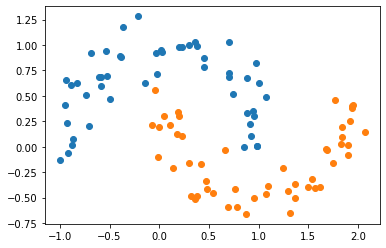

In [75]:
data_x,data_y=datasets.make_moons(noise=0.15,random_state=777)#生成月亮数据集
# random_state是随机种子，nosie是方
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1])
plt.scatter(data_x[data_y==1,0],data_x[data_y==1,1])
data_x=data_x[data_y<2,:2]#只取data_y小于2的类别，并且只取前两个特征
plt.show()

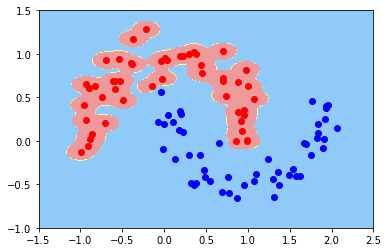

In [78]:
svc=RBFKernelSVC(gamma=100)#gamma参数很重要，gamma参数越大，支持向量越小
svc.fit(data_x,data_y)
plot_decision_boundary(svc,axis=[-1.5,2.5,-1.0,1.5])
plt.scatter(data_x[data_y==0,0],data_x[data_y==0,1],color='red')#画点
plt.scatter(data_x[data_y==1,0],data_x[data_y==1,1],color='blue')
plt.show()
